3. 尝试不同optimizer对模型进行训练，观察对比loss结果。

In [1]:
import torch
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
from torchvision.transforms.v2 import ToTensor
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [2]:
#加载数据集
olivetti_face = fetch_olivetti_faces(data_home = './data/olivetti_faces', shuffle = True)
# print(olivetti_face)
#拆分数据集
train_images, test_images, train_target, test_target = train_test_split(olivetti_face.data, olivetti_face.target, test_size = 0.2)
print(train_images.shape, test_images.shape, train_target.shape, test_target.shape)

(320, 4096) (80, 4096) (320,) (80,)


In [3]:
#将数据转换为张量
train_images_tensor = torch.tensor(train_images, dtype = torch.float32)
test_images_tensor = torch.tensor(test_images, dtype = torch.float32)
train_target_tensor = torch.tensor(train_target, dtype = torch.int64)
test_target_tensor = torch.tensor(test_target, dtype = torch.int64)

In [4]:
#创建数据加载器
train_dataset = TensorDataset(train_images_tensor, train_target_tensor)
test_dataset = TensorDataset(test_images_tensor, test_target_tensor)
#创建数据加载器
train_loader = DataLoader(dataset = train_dataset, batch_size = 10, shuffle = True)
test_loader = DataLoader(dataset = test_dataset, batch_size = 10, shuffle = True)

In [5]:
#参数设置
epochs = 1000
learning_rate = 0.001

In [6]:
#导入模型
from torch_nn_model import NN_Model_1,NN_Model_2,NN_Model_3,NN_Model_4
#创建模型
m1 = NN_Model_4()
m2 = NN_Model_4()
m3 = NN_Model_4()
m4 = NN_Model_4()

In [ ]:
#定义损失函数
loss_fn = torch.nn.CrossEntropyLoss()
#分别定义不同的优化器
optimizer_SGD = torch.optim.SGD(m1.parameters(), lr = learning_rate)
optimizer_RMSprop = torch.optim.RMSprop(m2.parameters(),lr = learning_rate)
optimizer_Adam = torch.optim.Adam(m3.parameters(), lr = learning_rate)
optimizer_AdamW = torch.optim.AdamW(m4.parameters(), lr = learning_rate)

In [8]:

#初始化损失记录列表
loss_history = []

#训练模型
def train_model(model,loss,optimizer,train_loader,epochs):
    loss_history.clear()
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for images, target in train_loader:
            #前向传播
            output = model(images)
            #计算损失
            loss = loss_fn(output, target)
            #梯度清零
            optimizer.zero_grad()
            #反向传播
            loss.backward()
            #更新参数
            optimizer.step()
            #累计损失
            running_loss += loss.item()
        # 计算平均损失并记录
        avg_loss = running_loss / len(train_loader)
        loss_history.append(avg_loss)
        #打印信息
        if epoch % 100 == 0:
            print(f'Epoch:{epoch} Loss: {avg_loss}')
# 绘制损失曲线
def draw_loss(loss_history):
    plt.plot(loss_history)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()

#测试模型
def test_model(model):
    correct = 0
    total = 0
    model.eval()
    with torch.no_grad():
        for images, target in test_loader:
            output = model(images.reshape(-1, 4096))
            _, predicted = torch.max(output, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()
    print(f'Accuracy: {correct/total*100}%')

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)
Epoch:0 Loss: 3.7508406937122345
Epoch:100 Loss: 1.8992040418088436
Epoch:200 Loss: 1.180776134133339
Epoch:300 Loss: 0.7598972907289863
Epoch:400 Loss: 0.5523079605773091
Epoch:500 Loss: 0.43028224632143974
Epoch:600 Loss: 0.3367778139654547
Epoch:700 Loss: 0.30301850696559995
Epoch:800 Loss: 0.2812003740109503
Epoch:900 Loss: 0.21303148893639445
Accuracy: 95.0%


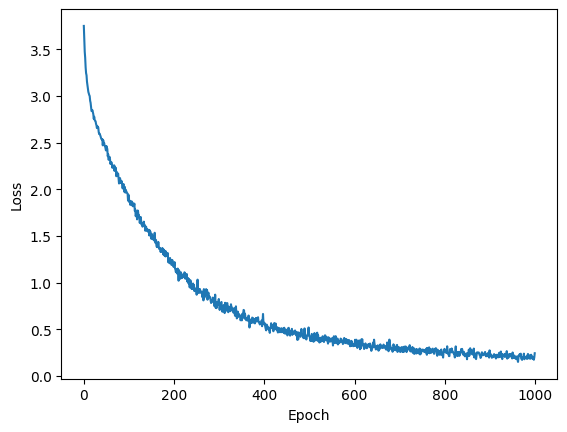

RMSprop (
Parameter Group 0
    alpha: 0.99
    capturable: False
    centered: False
    differentiable: False
    eps: 1e-08
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0
    weight_decay: 0
)
Epoch:0 Loss: 3.574003703892231
Epoch:100 Loss: 0.19464775534288492
Epoch:200 Loss: 0.1111028863597312
Epoch:300 Loss: 0.08851623797454522
Epoch:400 Loss: 0.03412941284796034
Epoch:500 Loss: 0.08368780951332155
Epoch:600 Loss: 0.05812472130693891
Epoch:700 Loss: 0.032949458752227656
Epoch:800 Loss: 0.022810716610337067
Epoch:900 Loss: 0.053188461671638265
Accuracy: 97.5%


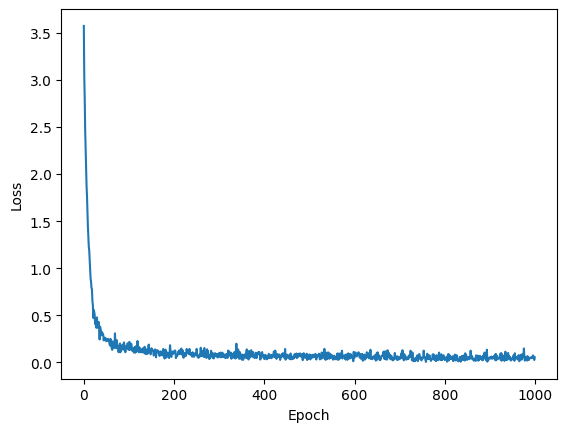

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)
Epoch:0 Loss: 3.543276757001877
Epoch:100 Loss: 0.14429647373617627
Epoch:200 Loss: 0.11528394532069797
Epoch:300 Loss: 0.06179569683081354
Epoch:400 Loss: 0.0561199840522022
Epoch:500 Loss: 0.07727206958406896
Epoch:600 Loss: 0.0792251759780811
Epoch:700 Loss: 0.05031095079539227
Epoch:800 Loss: 0.09368566007310619
Epoch:900 Loss: 0.040762819917517845
Accuracy: 96.25%


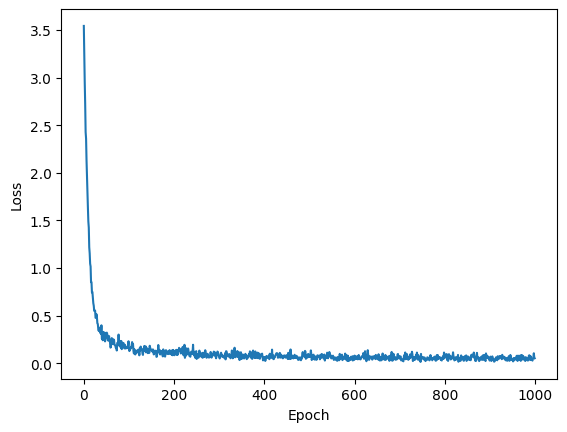

AdamW (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0.01
)
Epoch:0 Loss: 3.644069880247116
Epoch:100 Loss: 0.2054040090588387
Epoch:200 Loss: 0.14413622034771834
Epoch:300 Loss: 0.13625983727979474
Epoch:400 Loss: 0.043872701780856005
Epoch:500 Loss: 0.05680338411912089
Epoch:600 Loss: 0.05696170544297274
Epoch:700 Loss: 0.08255138979802723
Epoch:800 Loss: 0.04958408522725222
Epoch:900 Loss: 0.0860676330021306
Accuracy: 98.75%


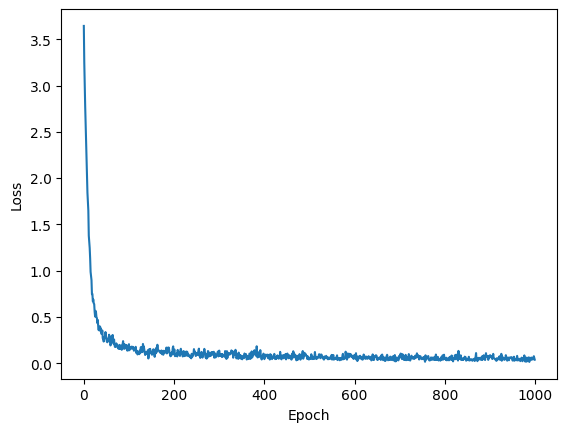

In [9]:
#分别测试

print(optimizer_SGD)
train_model(m1,loss_fn,optimizer_SGD,train_loader,epochs)
test_model(m1)
draw_loss(loss_history)

print(optimizer_RMSprop)
train_model(m2,loss_fn,optimizer_RMSprop,train_loader,epochs)
test_model(m2)
draw_loss(loss_history)

print(optimizer_Adam)
train_model(m3,loss_fn,optimizer_Adam,train_loader,epochs)
test_model(m3)
draw_loss(loss_history)

print(optimizer_AdamW)
train_model(m4,loss_fn,optimizer_AdamW,train_loader,epochs)
test_model(m4)
draw_loss(loss_history)